##### Concurrency 2021/2022 - Computer Science
# Lecture 2 - Deutsch Algorithm

1. [Review](#review)
2. [Quantum parallelism](#superposition)
3. [Deutsch's Algorithm](#Deutsch)
3. [Deutsch-Jozsa Algorithm](#Deutsch-jozsa)

## 1. Review <a id="review"></a>

States 

$$
|0\rangle = 
 \begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;
|1\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

form the computational basis and a single qubit quantum state is generally described as $|\psi\rangle$ that can be written as a complex superposition of these basis states as:

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$$

Here, $\alpha$ and $\beta$ are amplitudes that can be complex in nature. When the qubit is measured, the quantum system "collapses" to a classical state $|0\rangle$ with probability $|\alpha|^2$, or to the state $|1\rangle$ with probability $|\beta|^2$ ----> **Born Rule**

s.t $|\alpha|^2 + |\beta|^2 = 1$

Being the uniform superposition state, the most well-known superposition state

$$ 
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right)
$$


In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, visualize_transition
import matplotlib.pyplot as plt
import numpy as np

##### <span style="color: red;">EXERCISE 1:</span> - Create the uniform superposition state

In [2]:
def uniform_superposition(n_qubits=1):

    #create circuit
    qr = QuantumRegister(n_qubits)
    qc = QuantumCircuit(qr)
    
    # ou 
    # qc = QuantumCircuit(n_qubits)

    #evolve state into a superposition
    qc.h(qr)
    
    #measure the state
    qc.measure_all()
    
    return qc

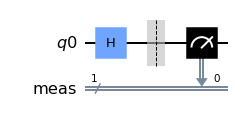

In [3]:
qc = uniform_superposition(1)
qc.draw(output="mpl")

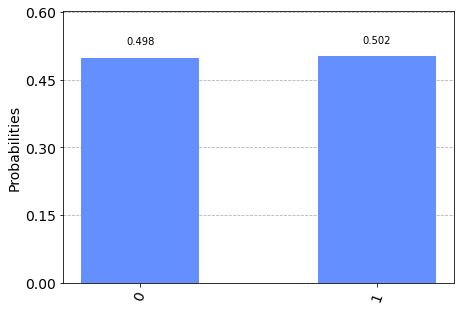

In [4]:
n_qubits = 1
qc = uniform_superposition(n_qubits=n_qubits)

#This is how we execute the quantum circuit in qiskit 
qasm_backed = Aer.get_backend("qasm_simulator")
result = execute(qc, qasm_backed, shots=1024).result()

counts = result.get_counts()

plot_histogram(counts)

#### Single-qubit gates 

(Let qr being the quantum register and qc being the quantum circuit.)


|Gate Name|qiskit Syntax |Matrix|        
|-|-|-|
|Identity |qc.id(qr)|  $Id = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$|
|Bit-flip or Pauli-X| qc.x(qr)| $ X = \begin{bmatrix} 0&1\\1&0 \end{bmatrix}$|
|Bit and phase-flip or Pauli-Y| qc.y(qr)|$ Y = \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}$|
|Phase-flip or Pauli-Z| qc.z(qr)| $Z = \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}$|
|Hadamard|qc.h(qr)| $ H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$|
|S or $\sqrt{Z}$-Phase|qc.s(qr)|$ S =\begin{bmatrix} 1 & 0 \\ 0 & i\end{bmatrix}$|
|$S^\dagger$ or conjugate $\sqrt{Z}$-Phase|qc.sdg(qr)| $S^\dagger =\begin{bmatrix} 1 & 0 \\ 0 & -i\end{bmatrix}$|
|T or $\sqrt{S}$-Phase|qc.t(qr)| $T=\begin{bmatrix}1 & 0 \\ 0 & e^{i \pi /\ 4}\end{bmatrix}$|
|$T^\dagger$ or conjugate $\sqrt{S}$-Phase|qc.tdg(qr)| $ T^\dagger =\begin{bmatrix}1 & 0 \\ 0 & e^{-i \pi /\ 4}\end{bmatrix}$|
|$R_y$ rotation gate |qc.ry(qr)| $ R_y(\theta) = \begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2}) \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2})\end{bmatrix}$|

### Multi-qubit states 


Consider two qubits of a quantum circuit, $q_a$ and $q_b$. Their joint-state description is written by the bra-ket notation:

&nbsp;

$$|q_a q_b\rangle = |q_a\rangle \otimes |q_b\rangle = 
\begin{pmatrix}
q_{a1} \\ 
q_{a2}
\end{pmatrix} \otimes
\begin{pmatrix}
q_{b1} \\ 
q_{b2}
\end{pmatrix} =
\begin{pmatrix}
q_{a1}.q_{b1} \\
q_{a1}.q_{b2} \\
q_{a2}.q_{b1} \\
q_{a2}.q_{b2}
\end{pmatrix}
$$

&nbsp;

Using the tensor product, we can determine the vector of an $n$-qubit basis state. For example:

&nbsp;

$$|00\rangle = |0\rangle \otimes |0\rangle = 
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
1 \\ 
0 \\
0 \\
0
\end{pmatrix}; 

|01\rangle = |0\rangle \otimes |1\rangle = 
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} \otimes
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
1 \\
0 \\
0
\end{pmatrix}
$$

$$|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}; 

|11\rangle = |1\rangle \otimes |1\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
0 \\
1
\end{pmatrix}
$$

</div>


### CNOT gate 

The controlled-NOT (or controlled-$X$ or CNOT) gate's action on basis states is to flip, i.e. apply an $X$ gate to the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit is $|1\rangle$; otherwise the target qubit goes unchanged.

The matrix describing a CNOT depends on which qubit acts as control. For a state $|q_1 q_0\rangle$, if we apply a CNOT operation with $q_1$ as control, the matrix is described as:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
$$

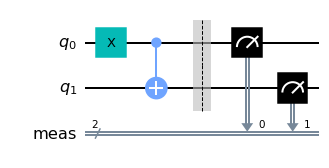

In [5]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)
qc.measure_all()
qc.draw(output="mpl")

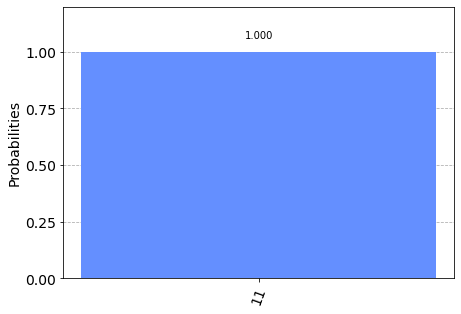

In [6]:
qasm_backed = Aer.get_backend("qasm_simulator")
result = execute(qc, qasm_backed, shots=1024).result()

counts = result.get_counts()

plot_histogram(counts)

### Toffoli gate 

The Toffoli gate performs an AND operation in classical computing. 

$$
CC_X = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix} 
$$

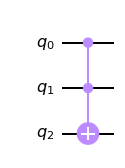

In [7]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output="mpl")

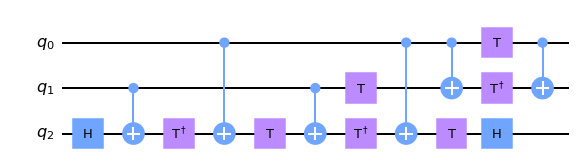

In [8]:
qc.decompose().draw(output="mpl")

Let control be the the 0 qubit and the target the 1 qubit.

|Gate Name|qiskit Syntax |        
|-|-|
|Controlled-X or controlled-Not|qc.cx(qr\[control\],qr\[target\])|
|Controlled-Y|qc.cy(qr\[control\],qr\[target\])|
|Controlled-Z or controlled-Phase|qc.cz(qr\[control\],qr\[target\])|
|Controlled-Hadamard|qc.ch(qr\[control\],qr\[target\])|
|SWAP|qc.swap(qr\[control\],qr\[target\])|

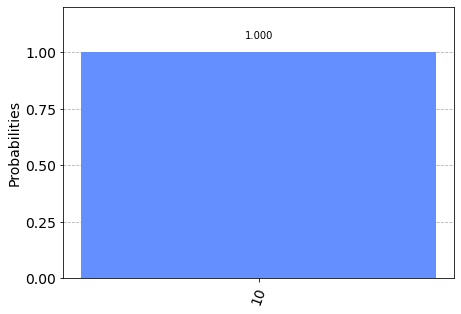

In [9]:
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
qc.measure_all()

qasm_backed = Aer.get_backend("qasm_simulator")
result = execute(qc, qasm_backed, shots=1024).result()

counts = result.get_counts()

plot_histogram(counts)

##### <span style="color: red;">EXERCISE 2:</span> - Create a circuit that applies a Toffoli gate to a quantum state, prepared from a bitstring

In [10]:
def toffoli_circuit(bitstring=None, ctrl1=0, ctrl2=1, target=2, n_qubits=3):

    qc = QuantumCircuit(n_qubits)
   
    ### YOUR CODE HERE ###
    for i,b in enumerate(bitstring):
        if int(b) == 1:
            qc.x(i)
    
    qc.ccx(0,1,2)
    qc.measure_all()
    return qc

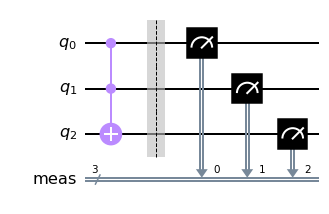

In [11]:
bitstring = "000"
qc = toffoli_circuit(bitstring=bitstring, n_qubits=3)
qc.draw(output="mpl")

##### <span style="color: red;">Question:</span> - What will be the resulting quantum state of the Toffoli?

##### <span style="color: red;">Question:</span> - What if we have the Hadamard applied to the first two qubits?

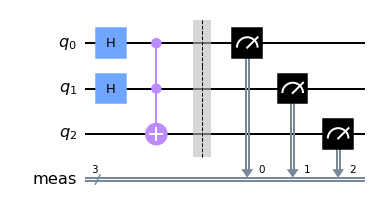

In [12]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.ccx(0,1,2)
qc.measure_all()
qc.draw(output="mpl")

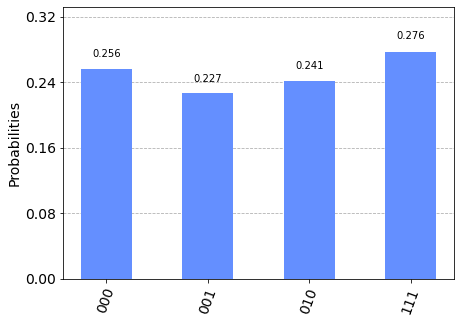

In [14]:
qasm_backed = Aer.get_backend("qasm_simulator")
result = execute(qc, qasm_backed, shots=1024).result()

counts = result.get_counts()

plot_histogram(counts)

## 2. Quantum Parallelism <a id="superposition"></a>

Quantum parallelism is a fundamental feature of many quantum algorithms. Using the superposition principle shown above, we can essentially evaluate a function for many different values simultaneously, because quantum computing is linear, therefore, an operator $U$ acts on every branch of the superposition at the same time. Thus, in parallel. 

$$ U|\psi\rangle = U(\alpha|0\rangle + \beta|1\rangle) = \alpha U |0\rangle + \beta U |1\rangle $$

##### <span style="color: red;">Question:</span> - Where do we run into problems? 

Because we will need to measure our state at some time! And we will only extract a single classical state, not the result of the function applied to every different state.

##### <span style="color: red;">EXERCISE 2:</span> - Compute the AND function in parallel for every possible input

In [92]:
def toffoli_parallel(ctrl1=0, ctrl2=1, target=2, n_qubits=3):

    qc = QuantumCircuit(n_qubits)

    #n_qubits-1 controls
    qc.h(n_qubits-1)
    qc.ccx(ctrl1,ctrl2,target)

    #measure the quantum circuit
    qc.measure_all()

    return qc

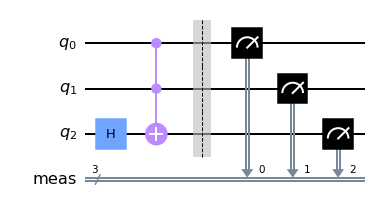

In [93]:
qc = toffoli_parallel(n_qubits=3)
qc.draw(output="mpl")

##### Execute the circuit and plot the histogram for counts

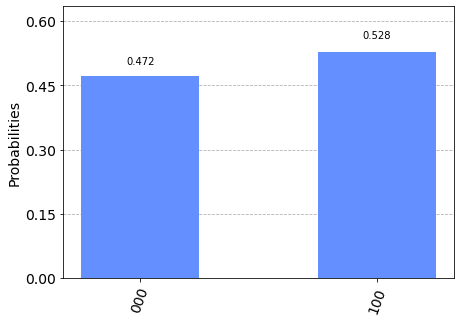

In [94]:
counts = execute(qc, shots=1024, backend=qasm_backed).result().get_counts()
plot_histogram(counts)

### Balanced vs constant boolean functions 

Let's consider Boolean function $f:\{0,1\} \rightarrow \{0,1\}$ that can either be balanced or constant.

- **Constant**: its output is always 0 or always 1
- **Balanced**: outputs 0 for half of the input value and 1 for the other half

##### <span style="color: red;">Question:</span> - The Toffoli function is balanced or constant ? What about the XOR? 

##### <span style="color: red;">Exercise 3:</span> - Implement a quantum circuit that performs the XOR function on every possible input in superposition 

Truth table for the XOr logic gate
|x_0|x_1|x_2|        
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [95]:
def xor_function(ctrl1=0, ctrl2=1, target=2, n_qubits=3):

    qc = QuantumCircuit(n_qubits)

    #state |10>
    qc.x(ctrl1)
    qc.x(ctrl2)
    qc.ccx(ctrl1,ctrl2,target)
    qc.x(ctrl2)
    
    #state |01>

    return qc

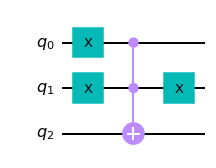

In [96]:
xor = xor_function()
xor.draw(output="mpl")

Suppose a **classical** algorithm that finds if the function is actually balanced or constant. The algorithm has to run through all the four possible combinations. In average the algorithm has to run through half the combinations in order to discover if the function is balanced .

In general, if we have $n$ bit string , we have to check $\frac{2^n}{2} + 1$. 

The quantum algorithm from Deutsch promises to find if the function is balanced or constant in a single step! 

But how ? We have seen that simply acting in superposition does not solve the problem because we will need to run the quantum circuit several times do the stochastic nature! 

The novel trick of the algorithm is actually collapse the superposition into a deterministic state of interest using INTERFERENCE ! Not possible in classical computing !

## 3. Deutsch's algorithm <a id='deutsch'></a>

<p align="center">
  <img width="600" height="200" src="images/deutsch.png">
</p>

$U_f$ is our function, usually seen as an oracle, or a black-box function that we want to find if it's balanced or constant

##### <span style="color: red;">Exercise 4:</span> - Suppose that the black-box function is actually the CNOT function. Implement the full deutsch circuit. 

In [22]:
def U_f(n_qubits=2):

    qc = QuantumCircuit(n_qubits)

    #apply CNOT function
    qc.cx(0,1)
    
    return qc


def deutsch(U_f=None, n_qubits=2):

    cr = ClassicalRegister(1)
    qr = QuantumRegister(n_qubits)
    qc = QuantumCircuit(qr,cr)

    # first qubit
    qc.h(qr[0])
    #second qubit
    qc.x(qr[1])
    qc.h(qr[1])
    #compose circuit with U_f
    qc = qc.compose(U_f)

    #interference first qubit
    qc.h(qr[0])

    #measure the first qubit
    qc.measure(qr[0],cr[0])

    return qc

Create the deutsch circuit

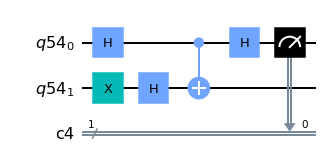

In [23]:
u_f = U_f()
qc = deutsch(U_f=u_f)
qc.draw(output="mpl")

Execute the circuit and see the result

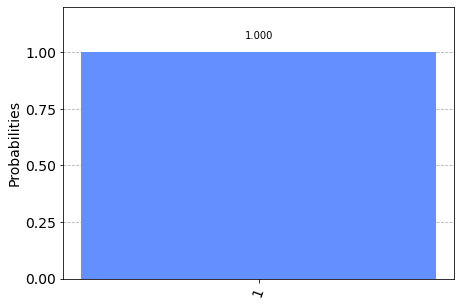

In [24]:
qasm_backed = Aer.get_backend("qasm_simulator")
result = execute(qc, qasm_backed, shots=1024).result()

counts = result.get_counts()
plot_histogram(counts)

What happens if we have the identity as $U_f$? Now, we have a constant function. Test and see what is the result. 

Do you noticed what happened? If we have a **constant** function we measure the state $|0\rangle$ with certainty and if we have balanced function we measure the state $|0\rangle$ with probability 0 !! 

##### why ? Let's go step by step


1) Initial state - $|00\rangle$
2) Create uniform superposition in the first qubit ------> $(H \otimes I) |00\rangle $
    $$ \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) |0\rangle = \frac{1}{\sqrt{2}}( |00\rangle + |10\rangle)$$
3) Apply $x$ gate to the second qubit - $(I \otimes X) \frac{1}{\sqrt{2}}( |00\rangle + |10\rangle)$
   $$ \frac{1}{\sqrt{2}}( |01\rangle + |11\rangle) $$
4) Create uniform superposition in the second qubit (attention to the signs !) ----->  $(I \otimes H) \frac{1}{\sqrt{2}}( |01\rangle + |11\rangle) $
   
$$H = 
\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

$$ \frac{1}{\sqrt{2}}( |0\rangle \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle ) + |1\rangle \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle )) = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$$

5) Apply $U_f = I$ - $I(\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle))$

    $$ \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle))$$

6) Apply hadamard to the first qubit ----> $(H \otimes I) \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle))$

    $$\frac{1}{2}\left[\frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) |0\rangle - \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) |1\rangle + \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle ) |0\rangle - \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle ) |1\rangle \right] $$

    $$\frac{1}{2\sqrt{2}}\left[|00\rangle + |10\rangle - |01\rangle -|11\rangle +|00\rangle -|10\rangle - |01\rangle + |11\rangle \right] $$

    $$\frac{1}{2\sqrt{2}} \left[2|00\rangle - 2|01\rangle \right]$$

Thus, we can see that by applying the hadamard in the first qubit after the function , we created interference, leaving only states with first qubit=0. We have a constant function. 

If we repeat the process for CNOT function instead, we will be measuring state $|1\rangle$ in the first qubit instead. 


## 4. Deutsch-Jozsa algorithm <a id='deutsch-josza'></a>

Deutsch-Josza algorithm is the generalization of the previous algorithm for boolean functions for $n$ bit strings rather than single bit string inputs.

<p align="center">
  <img width="700" height="200" src="images/dj.png">
</p>

The mechanics is essentially the same here, the only differences are:

* Hadamard uniform superposition over all qubits instead of a single qubit
* We will measure all input qubits instead of the single qubit
* $P(000 \dots 0)=0$ if the function is constant and $P(111 \dots 1)=1$ if the function is balanced


##### <span style="color: red;">Exercise 5:</span> - Suppose that the black-box function is the XOR function. Implement the full deutsch-josza algorithm. 